In [4]:

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

# Linear Regression
- We have one dependent and one independent variable.
  $$h_\theta(x)=\theta_0 + \theta_1 * x$$
- Let we have to pridict weight given height.
- Error : $\hat{y_i} = h_\theta(x)_i - y_i$
- We need to minimise this

## Cost Function  
$$J(\theta_0, \theta_1) = \frac{1}{2m} * \sum_{k=1}^{m}(h_\theta(x_i) - y_i)^2$$
- We need to select value of $\theta_0$ and $\theta_1$ such that we can minimize our cost function.
- We use gradient descent algorithm to minimize our cost function, which is given by:
  $$\theta_{new} = \theta_{old} - \alpha * g(\theta_{old})$$
  Where, $g(\theta)$ is a gradient vector of $J(\theta)$ and $\alpha$ is learning rate which decides the rate of convergence of algorithm.
- Until we found global minima, we keep changing our $\theta$ vector by above equation.

## Multiple Linear Regression

- Equation will look like :
$$h_{\theta}(x_1, x_2, x_3,\cdots,x_n) = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + \theta_3 * x_3 + \cdots +\theta_n * x_n$$

# Performance Metric

## 1. R Sqaured
- R-Square value is given by :
  $$ R^2 = 1 - \frac{SS_{residual}}{SS_{total}} $$
  $$ R^2 = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y_i})^2}{\sum_{i=1}^{m}(y_i - \bar{y})^2}$$
- $\bar{y}$ is a mean of $y_i$'s
- This value is between 0 to 1. So if this value is more towards 1, our model is good.

## 2. Adjusted R Sqaured
$$ Adjusted-R^2 = 1 - \frac{(1 - R^2) * (n - 1)}{n - p - 1}$$
- Where $n$ is number of data points, $p$ is number of independent features.


# Cost functions :  

## 1. Mean Squared Error
$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n}$$

|Advantages| Disadvantages|
|--|--|
|Differentiable| Not robust to outliers|
|It has one local and one global minima| It is not in the same unit|
|Converges faster||

## 2. Mean Absolute Error
$$MAE = \frac{\sum_{i=1}^{n}|y_i - \hat{y_i}|}{n}$$

|Disadvantages| Advantages|
|--|--|
|Non Differentiable at $x = 0$. So convergence usually take more time. Optimisation is a complex task.| Robust to outliers|
|Time consuming| It will be in the same unit|
## 3. Root Mean Absolute Error
$$RMSE = \sqrt{MSE}$$
$$EMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{n}}$$

|Advantages| Disadvantages|
|--|--|
|Differentiable| Not robust to outliers|
|It is in the same unit| |


# Overfitting and underfitting
- We divide our dataset into 2 datasets:
  1. Training Dataset
  2. Test Dataset

  #### 1. Training Dataset
  - Further we divide it into two datasets:
  1. Train : For training the model
  2. Validation : Hyperparameter tuning for model

### 1. Generalised model
1. Very Good accuracy -> Train dataset   [Low bias]
2. Very Good accuracy -> Test dataset    [Low variance]
3. 
### 2. Overfitting model
1. Very good accuracy -> Train Dataset [Low bias]
2. Bad accuracy -> Test Dataset [High Variance]
3. 
### 3. Underfitting Model
1. Low accuracy -> Train Dataset [High bias]
2. Low accuracy -> Test Dataset [High Variance]

# <h1 align=center>Implementation </h1>

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Shoyeb45/DataScience/main/Dataset/height-weight.csv")

Weight - Input (x) <br>
Height - Output (y)

In [7]:
def slope(val, X, Y):
    m = X.size  # Number of data points
    x1, x2 = 0, 0

    for i in range(m):
        x1 += (val[0] - val[1] * X[i] - Y[i])
        x2 += (val[0] - val[1] * X[i] - Y[i]) * (-X[i])

    x1 = x1 / x1.size
    x2 = x2 / x2.size

    return np.array([x1, x2]) 

In [8]:
def find_parameter(X, Y): 
    init_val = np.array([10.0, 20.0])  # Initial values as floats
    alpha = 0.001  # Learning rate

    s = slope(init_val, X, Y)

    max_iterations = 10000  # Safeguard for infinite loops
    iterations = 0

    while np.any(np.abs(s) > 1e-6):  # Continue until slope values are close to 0
        init_val = init_val - alpha * s
        s = slope(init_val, X, Y)

        iterations += 1
        if iterations > max_iterations:
            print("Max iterations reached. Exiting loop.")
            break

    return init_val

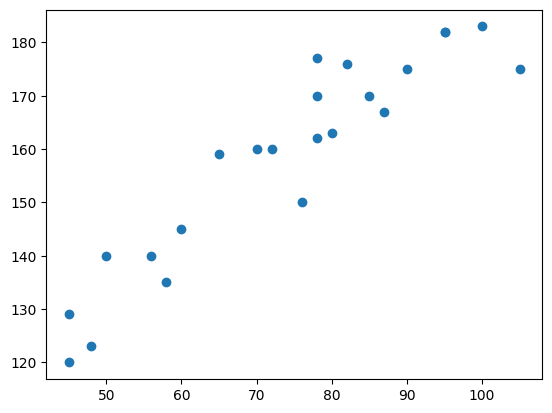

In [9]:
plt.scatter(df["Weight"], df["Height"])
plt.show()

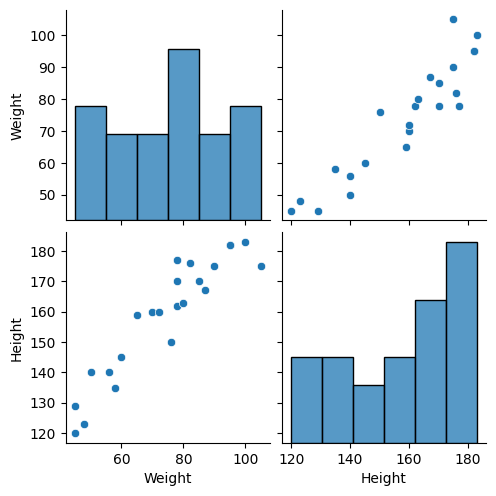

In [10]:
sns.pairplot(df)

In [19]:
# Independent and dependent feature segregation 

X = df[['Weight']]  # it will give data-frame 
Y = df['Weight'] # it's simple series 

### Make sure to have independent feature in form of dataframe or 2d array, dependent feature is ok

In [24]:
# Train, test - split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [13]:
# Library Standardization
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler()
scaler.fit_transform(x_train) 

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [15]:
#  for standardizing test-data we use transform, we do this to prevernt "data leakage"
scaler.transform(x_test)

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression()